In [3]:
from osgeo import ogr
r = ogr.Geometry(ogr.wkbLinearRing)
r.AddPoint(1,1)
r.AddPoint(5,1)
r.AddPoint(5,5)
r.AddPoint(1,5)
r.AddPoint(1,1)
poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(r)
print(poly.ExportToWkt())

POLYGON ((1 1 0,5 1 0,5 5 0,1 5 0,1 1 0))


In [1]:
from osgeo import ogr
geojson = """{"type":"Polygon","coordinates":[[[1,1],[5,1],[5,5],[1,5],[1,1]]]}"""
polygon = ogr.CreateGeometryFromJson(geojson)
print(polygon)

POLYGON ((1 1,5 1,5 5,1 5,1 1))


In [6]:
print("폴리곤 면적은 ", polygon.Area(), "입니다.")

폴리곤 면적은  16.0 입니다.


In [7]:
cen = polygon.Centroid()
print(cen)

POINT (3 3)


In [9]:
boundary = polygon.GetBoundary()
print(boundary)

LINESTRING (1 1,5 1,5 5,1 5,1 1)


In [14]:
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(10, 10)
polygon.Contains(point)

False

In [13]:
buffer = point.Buffer(2)
print(buffer)

POLYGON ((12 10,11.9972590695091 9.89532808751411,11.9890437907365 9.79094307346469,11.9753766811903 9.68713106991954,11.9562952014676 9.58417661836448,11.9318516525781 9.48236190979496,11.9021130325903 9.38196601125011,11.8671608529944 9.2832641009094,11.8270909152852 9.1865267138484,11.7820130483767 9.09201900052091,11.7320508075689 9.0,11.6773411358908 8.91072192996995,11.6180339887499 8.82442949541506,11.5542919229139 8.74135921790033,11.4862896509548 8.66173878728229,11.4142135623731 8.58578643762691,11.3382612127177 8.51371034904521,11.2586407820997 8.44570807708606,11.1755705045849 8.38196601125011,11.0892780700301 8.32265886410915,11.0 8.26794919243112,10.9079809994791 8.21798695162327,10.8134732861516 8.1729090847148,10.7167358990906 8.1328391470056,10.6180339887499 8.09788696740969,10.517638090205 8.06814834742186,10.4158233816355 8.04370479853239,10.3128689300805 8.02462331880973,10.2090569265353 8.01095620926345,10.1046719124859 8.00274093049085,10.0 8.0,9.89532808751412 8.

In [18]:
import osgeo.ogr, osgeo.osr

# 1. 좌표계 설정
spatialReference = osgeo.osr.SpatialReference()
spatialReference.ImportFromProj4('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

# 2. ShapeFile 생성
driver = osgeo.ogr.GetDriverByName('ESRI ShapeFile')
shapeData = driver.CreateDataSource('polygon.shp')

# 3. layer 생성
layer = shapeData.CreateLayer('polygon_layer', spatialReference, osgeo.ogr.wkbPolygon)
layerDefinition = layer.GetLayerDefn()

# 4. Feature 생성 및 Geometry 입력
featureIndex = 0
feature = osgeo.ogr.Feature(layerDefinition)
feature.SetGeometry(polygon)
feature.SetFID(featureIndex)

# 5. Layer에 Feature 입력
layer.CreateFeature(feature)



AttributeError: 'NoneType' object has no attribute 'CreateLayer'

In [19]:
!ogrinfo polygon.shp

INFO: Open of `polygon.shp'
      using driver `ESRI Shapefile' successful.
1: polygon (Polygon)


In [2]:
from osgeo import ogr
import os
shapefile = r'data/node.shp'
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile,0)
layer = dataSource.GetLayer()

# 데이터가 많아서 Sample로 5개 필드만 출력
idx = 0
for feature in layer:
    print(idx, ", ", feature.GetField("NODE_NAME"))
    idx += 1
    if(idx == 5):
        break
    

0 ,  하계5,6단지앞교차로
1 ,  공릉터널남측
2 ,  미성아파트5동앞
3 ,  유토피아빌딩
4 ,  청구빌라4단지401동


In [40]:
driver

In [41]:
layer.SetSpatialFilterRect(-102,26,-94,36)

In [ ]:
r'data/MOCT_LINK.shp'

# Shapely

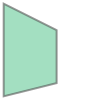

In [13]:
from shapely.geometry import Polygon
p1 = Polygon(((1,2), (5,3), (5,7), (1,9), (1,2)))
p1

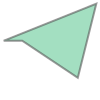

In [14]:
p2 = Polygon(((6,6), (7,6), (10,4), (11,8), (6,6)))
p2

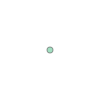

In [16]:
from shapely.geometry import Point
point = Point(2.0, 2.0)
point

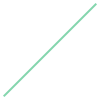

In [19]:
from shapely.geometry import LineString
line = LineString([(0,0), (10,10)])
line

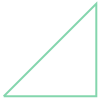

In [21]:
from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0,0), (3,3), (3,0)])
ring

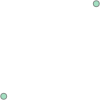

In [24]:
from shapely.geometry import MultiPoint
points = MultiPoint([(0,0), (3,3)])
points

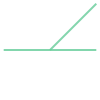

In [28]:
from shapely.geometry import MultiLineString
coords = MultiLineString([((0,0), (1,1)),((-1,0), (1,0))])
coords

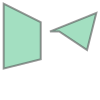

In [30]:
from shapely.geometry import MultiPolygon
polygons = MultiPolygon([p1,p2])
polygons

In [33]:

# 면적 구하기
print(p1.area)
# 경계 구하기
print(p1.bounds)
# 길이 구하기
print(p1.length)
# geometry Type 구하기
print(p1.geom_type)

22.0
(1.0, 2.0, 5.0, 9.0)
19.59524158061724
Polygon


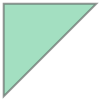

In [1]:
import json
from shapely.geometry import mapping, shape
jData = json.loads('{"type":"Polygon","coordinates":[[[1,1],[1,3],[3,3]]]}')
p = shape(jData)
p

In [41]:
mapping(p)

{'type': 'Polygon',
 'coordinates': (((1.0, 1.0), (1.0, 3.0), (3.0, 3.0), (1.0, 1.0)),)}

In [51]:
import fiona
c = fiona.open(r'data/node.shp')
rec = next(iter(c))
print('keys = ', rec.keys())
print('type = ', rec['type'])
print('prop = ', rec['properties'])
print('id   = ', rec['id'])
print('geom = ', rec['geometry'])

keys =  dict_keys(['type', 'id', 'properties', 'geometry'])
type =  Feature
prop =  OrderedDict([('NODE_ID', '1100025100'), ('NODE_TYPE', '101'), ('NODE_NAME', '하계5,6단지앞교차로'), ('TURN_P', '1'), ('REMARK', None)])
id   =  0
geom =  {'type': 'Point', 'coordinates': (205838.0880999937, 559449.3750999967)}


In [54]:
print(len(c))
print(c.driver)
print(c.crs)

100
ESRI Shapefile
{'proj': 'tmerc', 'lat_0': 38, 'lon_0': 127, 'k': 1, 'x_0': 200000, 'y_0': 600000, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True}


In [55]:
import fiona
with fiona.open(r'data/node.shp') as src:
    print(src[0])

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('NODE_ID', '1100025100'), ('NODE_TYPE', '101'), ('NODE_NAME', '하계5,6단지앞교차로'), ('TURN_P', '1'), ('REMARK', None)]), 'geometry': {'type': 'Point', 'coordinates': (205838.0880999937, 559449.3750999967)}}


In [4]:
import geopandas as gpd 
%matplotlib inline
df = gpd.read_file(r'data/link.shp')

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry
0,2180383101,2180132301,2180132201,1,101,000,17,서울문산고속도로,0,0,101,50,5,0.0,0,169.151774,None,"LINESTRING (310943.925 4166093.439, 310954.822..."
1,1670228601,1670065501,1150050000,1,107,000,-,개화동로8길,0,0,000,60,0,0.0,0,2292.224915,None,"LINESTRING (304549.116 4161377.777, 304552.594..."
2,1670228701,1150050000,1670065501,1,107,000,-,개화동로8길,0,0,000,60,0,0.0,0,2276.341245,None,"LINESTRING (305483.227 4161305.668, 305380.019..."
3,2320563501,1670065201,1670065401,1,107,000,-,당산길,0,0,000,60,0,0.0,0,795.766877,None,"LINESTRING (303139.895 4161987.989, 303159.392..."
4,1670228401,1670065401,1670065301,1,107,003,-,-,0,0,000,60,0,0.0,0,502.289025,도로명없음,"LINESTRING (303118.401 4162071.316, 303193.039..."


In [5]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [6]:
df.shape

(1331, 18)

In [7]:
df.columns

Index(['LINK_ID', 'F_NODE', 'T_NODE', 'LANES', 'ROAD_RANK', 'ROAD_TYPE',
       'ROAD_NO', 'ROAD_NAME', 'ROAD_USE', 'MULTI_LINK', 'CONNECT', 'MAX_SPD',
       'REST_VEH', 'REST_W', 'REST_H', 'LENGTH', 'REMARK', 'geometry'],
      dtype='object')

In [10]:
df.loc[0]

LINK_ID                                              2180383101
F_NODE                                               2180132301
T_NODE                                               2180132201
LANES                                                         1
ROAD_RANK                                                   101
ROAD_TYPE                                                   000
ROAD_NO                                                      17
ROAD_NAME                                              서울문산고속도로
ROAD_USE                                                      0
MULTI_LINK                                                    0
CONNECT                                                     101
MAX_SPD                                                      50
REST_VEH                                                      5
REST_W                                                        0
REST_H                                                        0
LENGTH                                  

In [13]:
df['ROAD_NAME']

0       서울문산고속도로
1         개화동로8길
2         개화동로8길
3            당산길
4              -
          ...   
1326    서울문산고속도로
1327    서울문산고속도로
1328    서울문산고속도로
1329    서울문산고속도로
1330    서울문산고속도로
Name: ROAD_NAME, Length: 1331, dtype: object

In [16]:
서울문산고속도로 = df[df['ROAD_NAME'] == '서울문산고속도로']
서울문산고속도로

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry
0,2180383101,2180132301,2180132201,1,101,000,17,서울문산고속도로,0,0,101,50,5,0.0,0,169.151774,None,"LINESTRING (310943.925 4166093.439, 310954.822..."
1259,2180381701,2180132001,2180131901,1,101,000,17,서울문산고속도로,0,0,101,50,5,0.0,0,230.296518,None,"LINESTRING (311022.583 4165728.535, 311019.578..."
1260,2180381801,2180131901,2180132201,1,101,000,17,서울문산고속도로,0,0,101,50,5,0.0,0,687.130855,None,"LINESTRING (311017.751 4165484.984, 311027.661..."
1279,2180383201,2180132501,2180132301,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,772.479445,None,"LINESTRING (310549.597 4166758.593, 310604.657..."
1280,2180383301,2180132301,2180132501,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,773.677640,None,"LINESTRING (310971.213 4166110.512, 310884.491..."
1281,2180382501,2180132301,2180132001,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,380.665251,None,"LINESTRING (310944.183 4166093.935, 310963.899..."
1282,2180382601,2180132001,2180132301,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,400.043073,None,"LINESTRING (311053.611 4165725.992, 311057.266..."
1283,2180381301,2180132001,2180131701,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,372.253198,None,"LINESTRING (311026.388 4165728.553, 311021.737..."
1284,2180381401,2180131701,2180132001,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,384.691153,None,"LINESTRING (310936.262 4165363.800, 310976.874..."
1285,2180381001,2180131701,2180131601,3,101,000,17,서울문산고속도로,0,0,000,100,5,0.0,0,295.717090,None,"LINESTRING (310915.952 4165376.382, 310873.223..."


<AxesSubplot:>

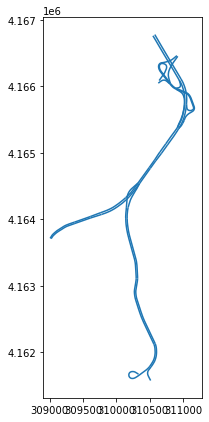

In [17]:
서울문산고속도로.plot(figsize=(7,7))

<AxesSubplot:>

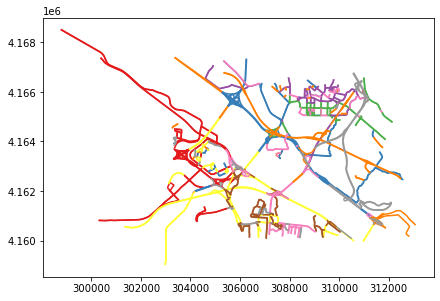

In [20]:
df.plot(cmap="Set1", figsize=(7,7))

<AxesSubplot:>

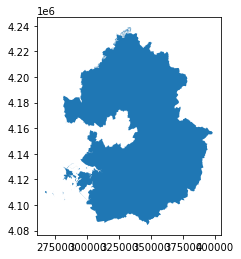

In [42]:
seoul = gpd.read_file(r'data/seoul.shp')
seoul.plot()

In [35]:
df.crs

<Projected CRS: EPSG:32652>
Name: WGS 84 / UTM zone 52N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 126°E to 132°E - by country
- bounds: (126.0, 0.0, 132.0, 84.0)
Coordinate Operation:
- name: UTM zone 52N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
gpd.sjoin(df, seoul, op='within')

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,...,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry,index_right,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM
0,2180383101,2180132301,2180132201,1,101,000,17,서울문산고속도로,0,0,...,5,0.0,0,169.151774,None,"LINESTRING (310943.925 4166093.439, 310954.822...",0,41,Gyeonggi-do,경기도
8,2320555601,2320195200,2320196401,2,104,000,-,정서진로,0,0,...,0,0.0,0,672.200700,None,"LINESTRING (304465.519 4162929.625, 304360.422...",0,41,Gyeonggi-do,경기도
9,2320555701,2320196401,2320195200,2,104,000,-,정서진로,0,0,...,0,0.0,0,668.005600,None,"LINESTRING (303985.037 4162462.041, 304158.181...",0,41,Gyeonggi-do,경기도
10,2320555301,2320196401,2320196301,1,104,000,-,정서진로,0,0,...,0,0.0,0,67.551800,None,"LINESTRING (303975.404 4162469.699, 303925.647...",0,41,Gyeonggi-do,경기도
11,2320555401,2320196301,2320196401,1,104,000,-,정서진로,0,0,...,0,0.0,0,67.528700,None,"LINESTRING (303936.510 4162415.040, 303985.037...",0,41,Gyeonggi-do,경기도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,2180382401,2180132201,2180132001,1,101,000,17,서울문산고속도로,0,0,...,5,0.0,0,615.041375,None,"LINESTRING (310894.183 4165958.084, 310953.552...",0,41,Gyeonggi-do,경기도
1327,2180381201,2180131701,2180131801,1,101,000,17,서울문산고속도로,0,0,...,5,0.0,0,94.886223,None,"LINESTRING (310936.333 4165363.721, 310976.436...",0,41,Gyeonggi-do,경기도
1328,2180381101,2180131801,2180131701,1,101,000,17,서울문산고속도로,0,0,...,5,0.0,0,89.821312,None,"LINESTRING (310950.740 4165459.166, 310939.505...",0,41,Gyeonggi-do,경기도
1329,2180381601,2180131801,2180131901,1,101,000,17,서울문산고속도로,0,0,...,5,0.0,0,52.163489,None,"LINESTRING (310993.933 4165438.465, 311012.870...",0,41,Gyeonggi-do,경기도
